# <font color='lightsalmon'> Overview </font>

## <font color='palevioletred'> Context </font>
The reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries will end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to the notion of child mortality is maternal mortality, which accounts for 295,000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, where most could have been prevented.

In light of what was mentioned, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, shedding light on fetal heart rate (FHR), fetal movements, uterine contractions, and more. CTGs have a high degree of sensitivity but a low level of specificity, meaning that they are very good at identifying which fetuses are well, but are poor at identifying which fetuses are unwell.

## <font color='palevioletred'> Data </font>
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:
* Normal
* Suspect
* Pathological
> Source: https://www.kaggle.com/andrewmvd/fetal-health-classification

## <font color='palevioletred'> Goal </font>
Create an accurate multiclass machine-learning model to classify CTG features into the 3 fetal health classes

## <font color='palevioletred'> Citation </font>
Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318
> Source: https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9

# <font color='lightsalmon'> Preliminary Setup & Inspection </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-darkgrid')
sns.set(font_scale=1.5)
color = ['teal', 'orange', 'palevioletred']

In [2]:
fh_data = pd.read_csv('fetal_health.csv')
print(fh_data.shape[0], 'rows *', fh_data.shape[1], 'columns')
fh_data.head()

2126 rows * 22 columns


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
fh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
fh_data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Features
* **Baseline value** : the baseline fetal heart rate (FHR) during a 10 minute segment rounded to the nearest 5 beats per minute (bpm) increment, excluding periods of (1) marked FHR variability, (2) periodic or episodic changes, and (3) segments of baseline that differ by more than 25 bpm

* **Accelerations**: the number of accelerations per second; short-term rises in the heart rate of at least 15 bpm above the baseline value, lasting at least 15 seconds; they are normal and healthy, telling the doctor that the baby has an adequate oxygen supply

* **Fetal Movement**: the number of fetal movements per second

* **Uterine Contractions**: the number of uterine contractions per second used to gauge the activity of labour: too few contractions indicate labour is not progressing and too many contractions can mean uterine hyperstimulation, which can lead to fetal compromise

* **Decelerations**: transient episodes of a decrease of FHR below the baseline value of more than 15 bpm lasting at least 15 seconds
  * **light_decelerations**: number of light decelerations per second
  * **Severe_decelerations**: number of severe decelerations per second
  * **prolongued_decelerations**: number of prolonged decelerations per second
  
* **Short Term Variability (STV)**: the beat-to-beat variation in FHR; the oscillation of the FHR around the baseline value in an amplitude of 5 to 10 bpm; low STV is predictive for hypoxia during the antenatal period
  * **abnormal_short_term_variability**: percentage of time with abnormal STV
  * **mean_value_of_short_term_variability**: mean value of STV
 
* **Long Term Variability (LTV)**: a somewhat slower oscillation in heart rate with a frequency of 3 to 10 cycles per minute and an amplitude of 10 to 25 bpm
  * **percentage_of_time_with_abnormal_long_term_variability**: percentage of time with abnormal LTV
  * **mean_value_of_long_term_variability**: mean value of LTV

Target
* 1 - **Normal**
* 2 - **Suspect**
* 3 - **Pathological**

The rest of the histogram columns will bear little to no significance for the machine-learning models and their predictive accuracy since they are analyses of the aforementioned features

# <font color='lightsalmon'> Exploratory Data Analysis </font>

Theoretical relationships to be explored with respect to (wrt) the target:
1. The normal baseline FHR is 110-160 bpm
2. Accelerations in FHR are normal and healthy and thus should have negative correlation with fetal mortality
3. Too few contractions indicate labor is not progressing, while too many contractions can indicate uterine hyperstimulation, possibly leading to fetal compromise
    * The normal range for uterine contractions is 0.005-0.008 contractions per second
4. Decelerations should be absent for healthy fetal growth

Other relationships to be explored wrt the target:
1. Fetal health
2. Fetal movement
3. Variability

## <font color='palevioletred'> Preprocessing </font>

In [5]:
# drop insignificant columns
fh_data = fh_data.drop(columns=['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
                                'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency'])

# rename some columns for better readability
fh_data = fh_data.rename(columns={'baseline value'                                            : 'baseline_FHR',
                                  'abnormal_short_term_variability'                           : 'abnormal_STV',
                                  'mean_value_of_short_term_variability'                      : 'mean_STV',
                                  'percentage_of_time_with_abnormal_long_term_variability'    : 'abnormal_LTV',
                                  'mean_value_of_long_term_variability'                       : 'mean_LTV'})

# convert the fetal health categories from float to int
fh_data['fetal_health'] = fh_data['fetal_health'].astype('uint8')

fh_data.head()

,baseline_FHR,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_STV,mean_STV,abnormal_LTV,mean_LTV,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1


## <font color='palevioletred'> Data Analysis </font>

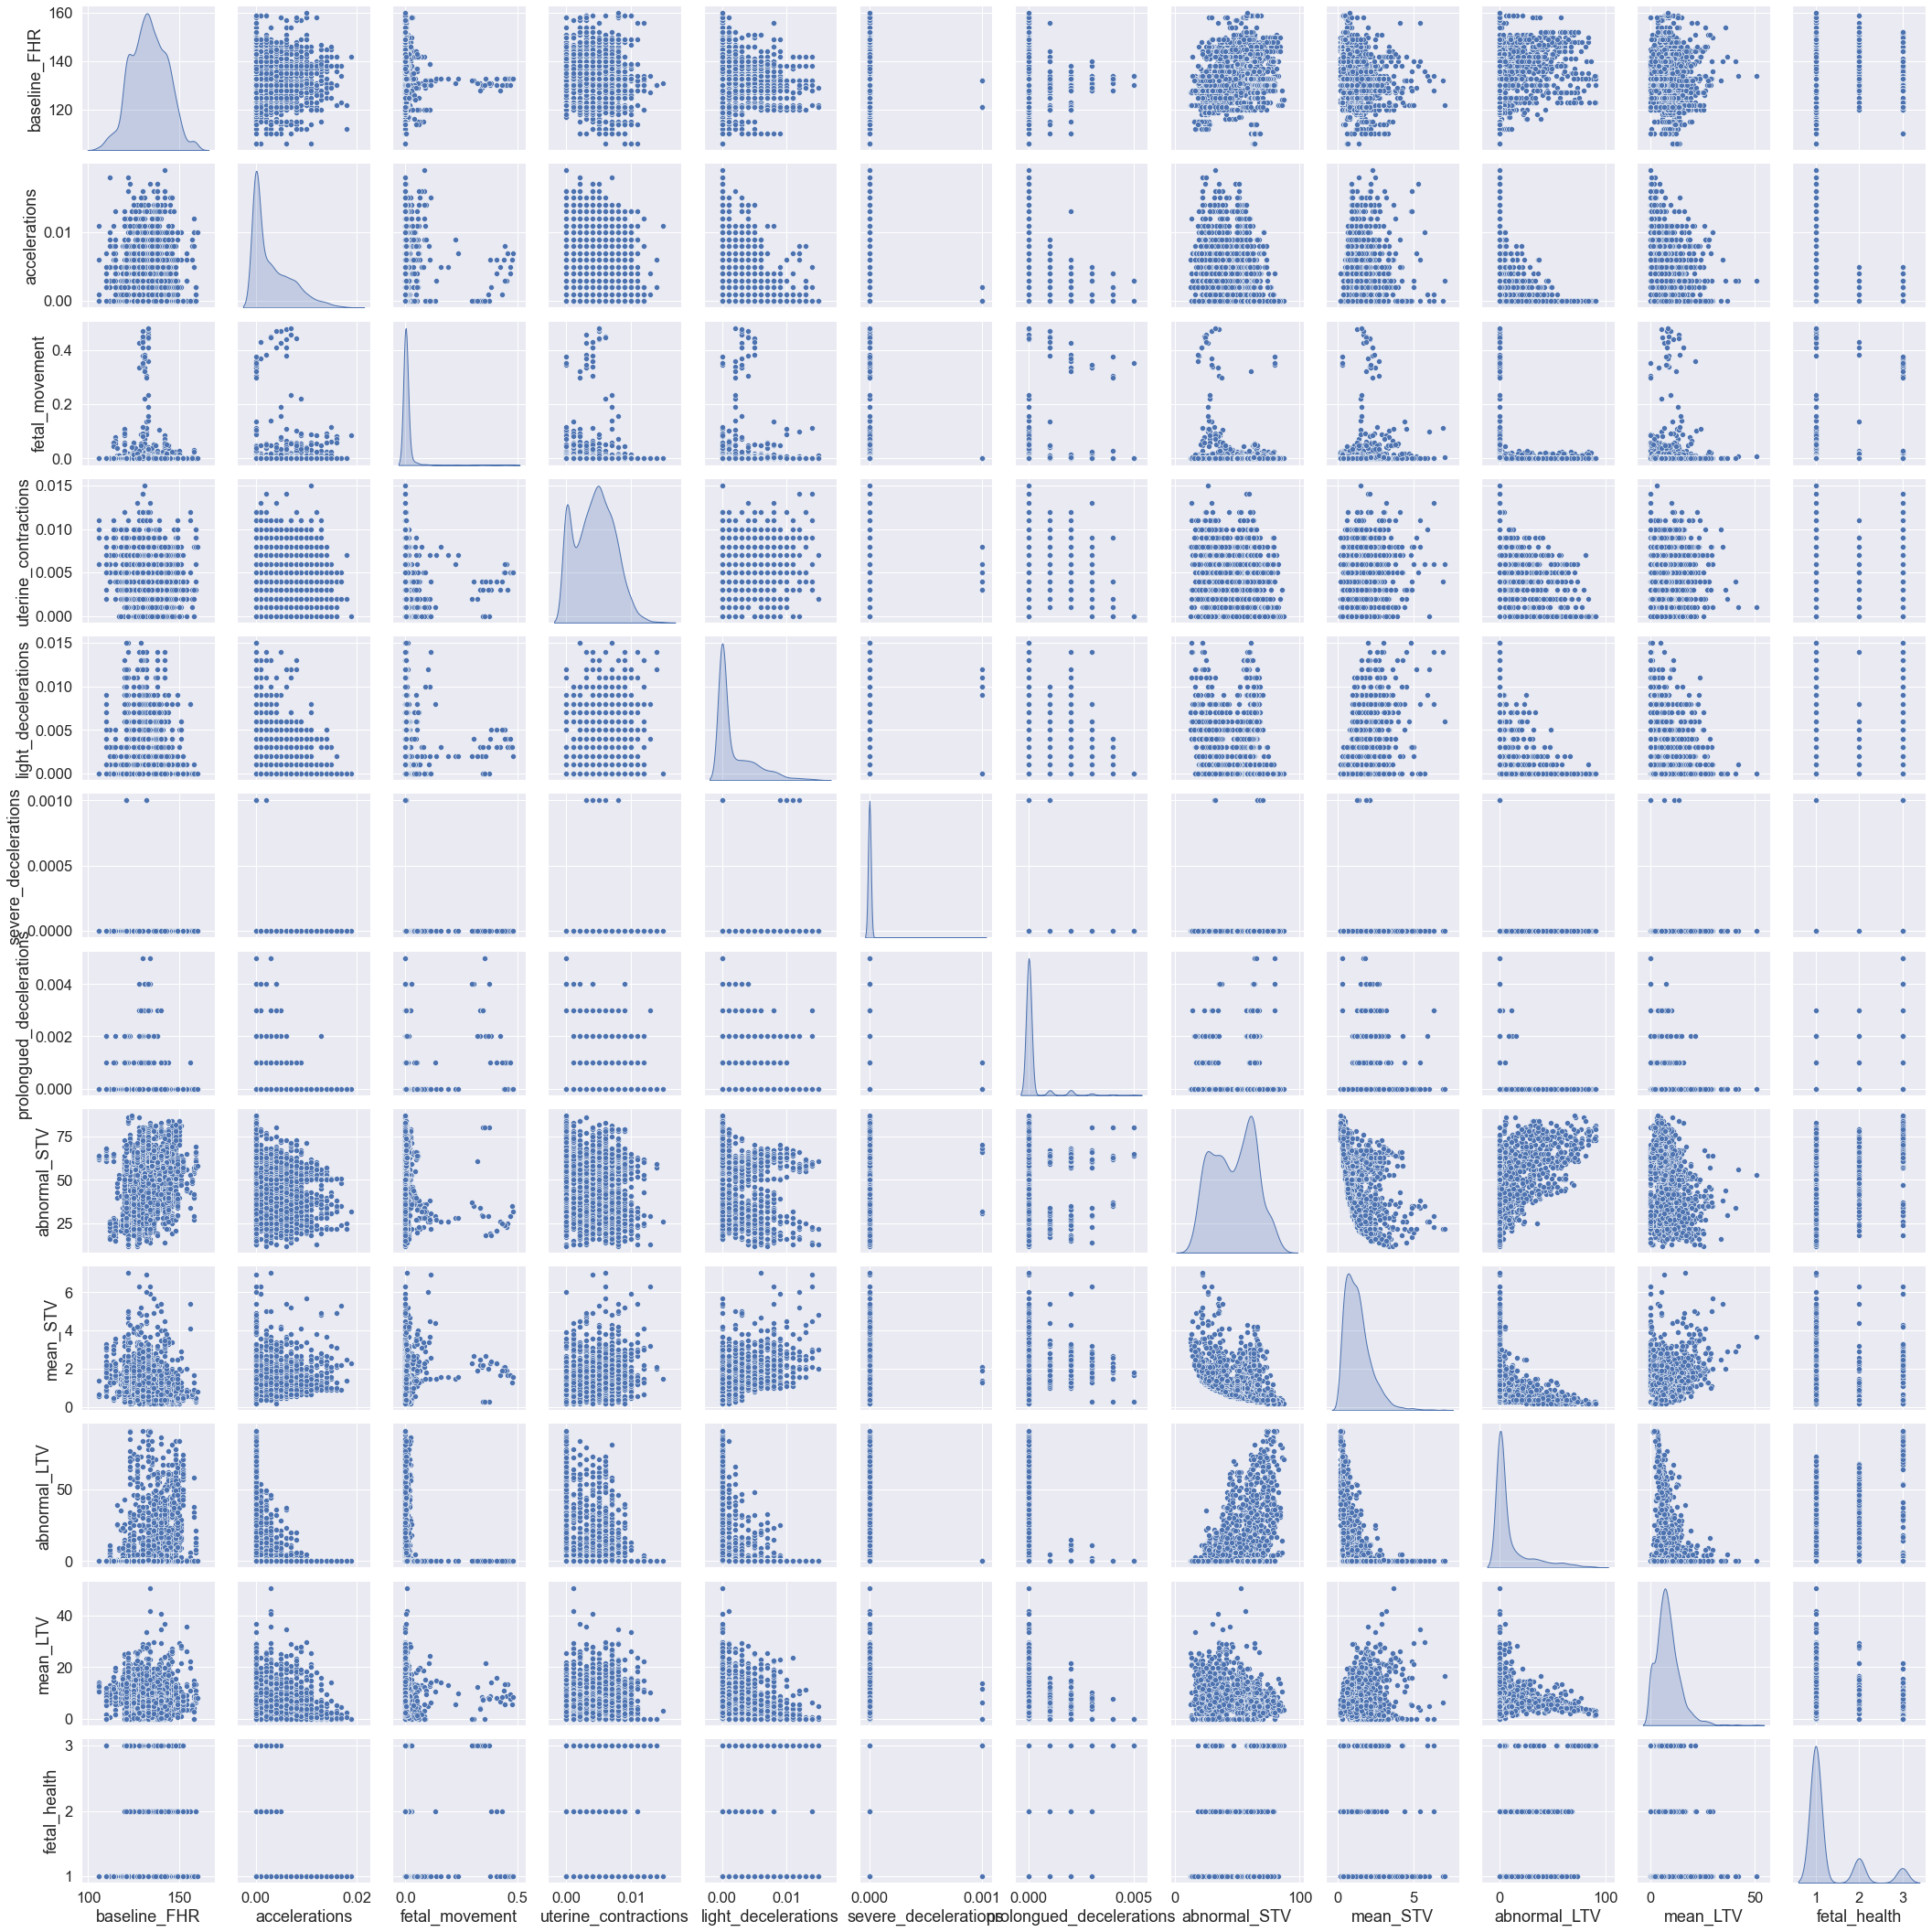

In [6]:
# quick visualization of all KDEs and relationships among columns
sns.pairplot(fh_data, diag_kind='kde')
plt.show()

### <font color='mediumseagreen'> Analyzing Fetal Health </font>

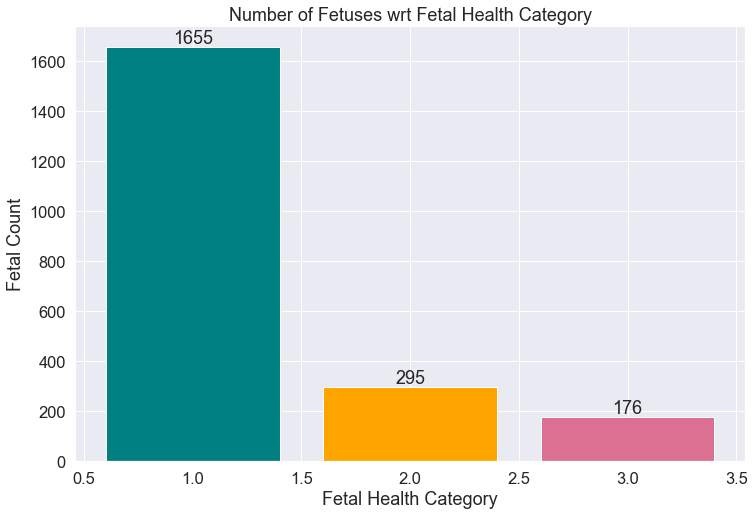

In [7]:
fetal_health_counts = fh_data['fetal_health'].value_counts()
x_index = fetal_health_counts.index
y_count = fetal_health_counts.values

# histogram to visualize distribution of categories
plt.figure(figsize=(12,8))
plt.bar(x=x_index, height=y_count, color=color)
plt.title('Number of Fetuses wrt Fetal Health Category')
plt.xlabel('Fetal Health Category')
plt.ylabel('Fetal Count')

# display fetal count above each bar
for i in range(len(y_count)):
    plt.annotate(str(y_count[i]), xy=(x_index[i], y_count[i]), ha='center', va='bottom')

plt.show()

Due to the imbalance in the data, which tends to provide misleading classification accuracy, performance will be measured using more appropriate tools such as confusion matrix, precision, recall, and F1 score

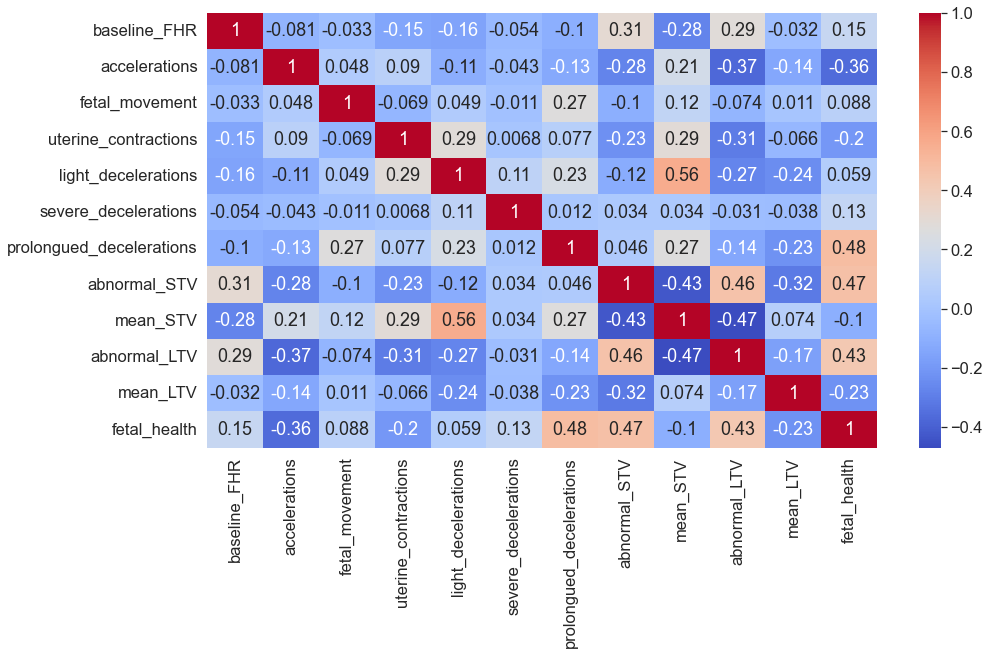

In [8]:
# heat map to view respective column correlations
plt.figure(figsize=(15,8))
sns.heatmap(fh_data.corr(), annot=True, cmap='coolwarm')
plt.show()

Features with significant correlation w.r.t. fetal_health
* accelearations: strong negative correlation
* uterine_contractions: weak negative correlation
* prolonged_decelerations: strong positive correlation
* abnormal_STV: strong positive correlation
* mean_STV: weak negative correlation
* abnormal_LTV: strong positive correlation
* mean_LTV: weak negative correlation

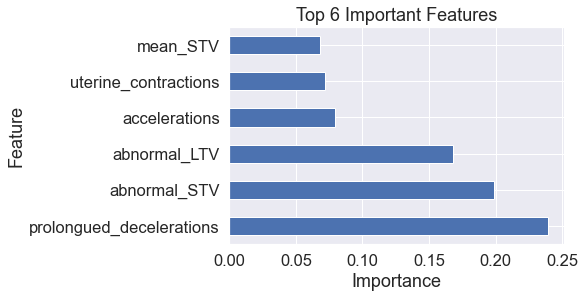

In [9]:
X = fh_data.drop(columns=['fetal_health'])
y = fh_data['fetal_health']

# using extra trees regressor model to extract important features
et = ExtraTreesRegressor()
et.fit(X, y)
feat_importances = pd.Series(et.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.title('Top 6 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### <font color='mediumseagreen'> Analyzing Baseline FHR </font>

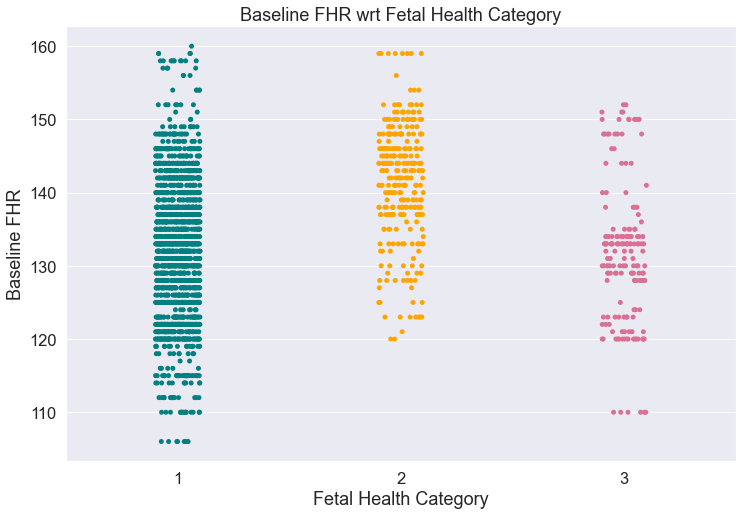

In [10]:
# visualize distribution of baseline FHR in each health category
plt.figure(figsize=(12,8))
sns.stripplot(data=fh_data, x='fetal_health', y='baseline_FHR', jitter=True, palette=color)
plt.title('Baseline FHR wrt Fetal Health Category')
plt.xlabel('Fetal Health Category')
plt.ylabel('Baseline FHR')
plt.show()

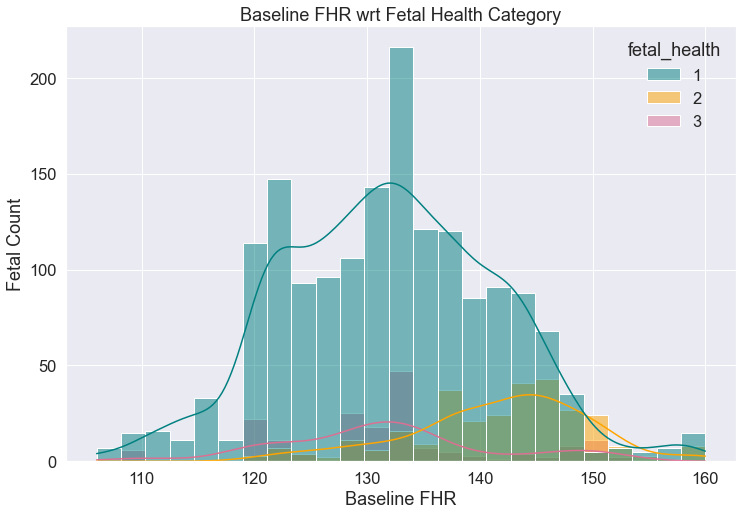

In [11]:
# visualize another distribution of baseline FHR in each health category
plt.figure(figsize=(12,8))
sns.histplot(data=fh_data, x='baseline_FHR', kde=True, hue='fetal_health', palette=color)
plt.title('Baseline FHR wrt Fetal Health Category')
plt.xlabel('Baseline FHR')
plt.ylabel('Fetal Count')
plt.show()

According to the histogram, there is a mostly normal distribution for normal and pathological cases (majority of cases have an average heart rate), and a right-skewed distribution for suspect cases (majority of cases have a higher-than-average heart rate).

As seen in the correlation matrix and the strip plot, there is no significantly clear relationship between baseline FHR and fetal health. This is most likely due to the fact that most of the recorded values are between 110-160 bpm, which is the normal bpm range, meaning this feature cannot serve very well in making predictions for fetal health.

Overall, we can draw that baseline FHR may not serve significant informational purpose concerning the various models' predictive accuracy, but will still be included since it does hold a small level of correlation and significance.

### <font color='mediumseagreen'> Analyzing Acceleration </font>

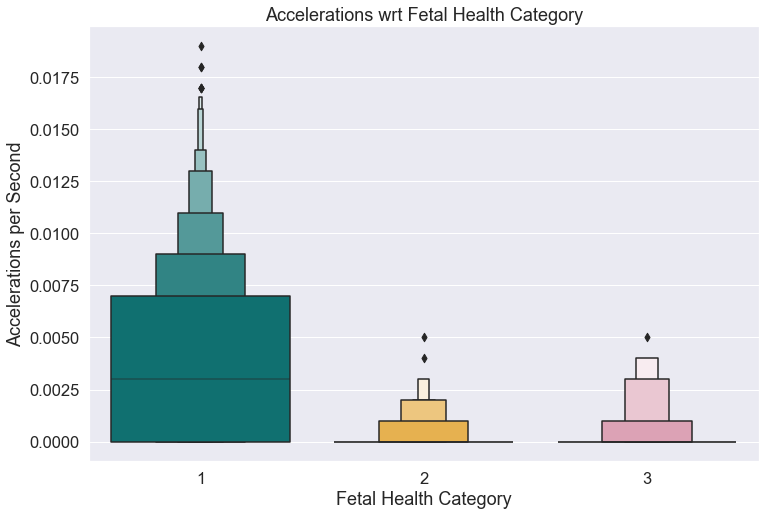

In [12]:
# visualize distribution, quantiles, outliers of accelerations in each fetal health category
plt.figure(figsize=(12,8))
sns.boxenplot(data=fh_data, x='fetal_health', y='accelerations', palette=color)
plt.title('Accelerations wrt Fetal Health Category')
plt.xlabel('Fetal Health Category')
plt.ylabel('Accelerations per Second')
plt.show()

From the box plot, it is apparent that the median value for accelerations in the normal case is significantly higher than the median values for the suspect and pathological cases.

In [13]:
fh_data.groupby('fetal_health')['accelerations'].median()

fetal_health
1    0.003
2    0.000
3    0.000
Name: accelerations, dtype: float64

In [14]:
# distribution of accelerations for suspect case
sus_acc_df = fh_data.loc[fh_data['fetal_health'] == 2][['accelerations', 'fetal_health']]
sus_acc_df = sus_acc_df['accelerations'].value_counts()
sus_acc_df.index.name = 'accelerations'
sus_acc_df = sus_acc_df.to_frame(name='fetal_count')
sus_acc_df.reset_index(inplace=True)
sus_acc_df

,accelerations,fetal_count
0,0.000,249
1,0.002,20
2,0.001,20
3,0.003,4
4,0.005,1
5,0.004,1


In [15]:
# percentage distribution of accelerations for suspect case
sus_acc_df['fetal_count'] = sus_acc_df['fetal_count'] / len(fh_data.loc[fh_data['fetal_health'] == 2])
sus_acc_df.rename(columns={'fetal_count': 'fetal_count_percentage'}, inplace=True)
sus_acc_df

,accelerations,fetal_count_percentage
0,0.000,0.844068
1,0.002,0.067797
2,0.001,0.067797
3,0.003,0.013559
4,0.005,0.003390
5,0.004,0.003390


In [16]:
# distribution of accelerations for pathological case
path_acc_df = fh_data.loc[fh_data['fetal_health'] == 3][['accelerations', 'fetal_health']]
path_acc_df = path_acc_df['accelerations'].value_counts()
path_acc_df.index.name = 'accelerations'
path_acc_df = path_acc_df.to_frame(name='fetal_count')
path_acc_df.reset_index(inplace=True)
path_acc_df

,accelerations,fetal_count
0,0.000,146
1,0.001,11
2,0.002,7
3,0.004,6
4,0.003,5
5,0.005,1


In [17]:
# percentage distribution of accelerations for pathological case
path_acc_df['fetal_count'] = path_acc_df['fetal_count'] / len(fh_data.loc[fh_data['fetal_health'] == 3])
path_acc_df.rename(columns={'fetal_count': 'fetal_count_percentage'}, inplace=True)
path_acc_df

,accelerations,fetal_count_percentage
0,0.000,0.829545
1,0.001,0.062500
2,0.002,0.039773
3,0.004,0.034091
4,0.003,0.028409
5,0.005,0.005682


It is apparent that the vast majority of fetuses experience no acceleration in the suspect and pathological cases. Therefore, the theoretical relationship on acceleration holds: accelerations are considered to be healthy, and a majority of fetuses in suspect and pathological cases do not experience them. Overall, there is a significant relationship between acceleration and fetal health.

### <font color='mediumseagreen'> Analyzing Uterine Contractions </font>

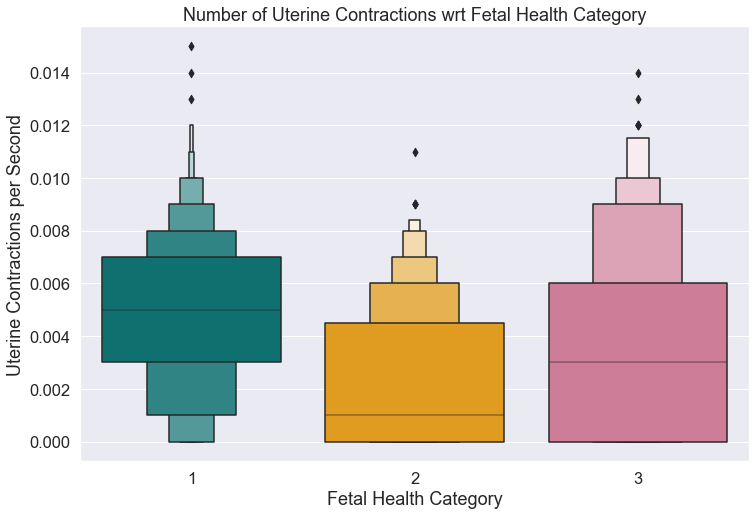

In [18]:
# visualize distribution, quantiles, outliers of uterine contractions in each fetal health category
plt.figure(figsize=(12,8))
sns.boxenplot(data=fh_data, x='fetal_health', y='uterine_contractions', palette=color)
plt.title('Number of Uterine Contractions wrt Fetal Health Category')
plt.xlabel('Fetal Health Category')
plt.ylabel('Uterine Contractions per Second')
plt.show()

In [19]:
fh_data.groupby('fetal_health')['uterine_contractions'].median()

fetal_health
1    0.005
2    0.001
3    0.003
Name: uterine_contractions, dtype: float64

Uterine contractions for normal cases are within the healthy bounds of [0.005, 0.008], however, suspect and pathological cases fall slightly short, giving credence to their detrimental significance in fetal health.

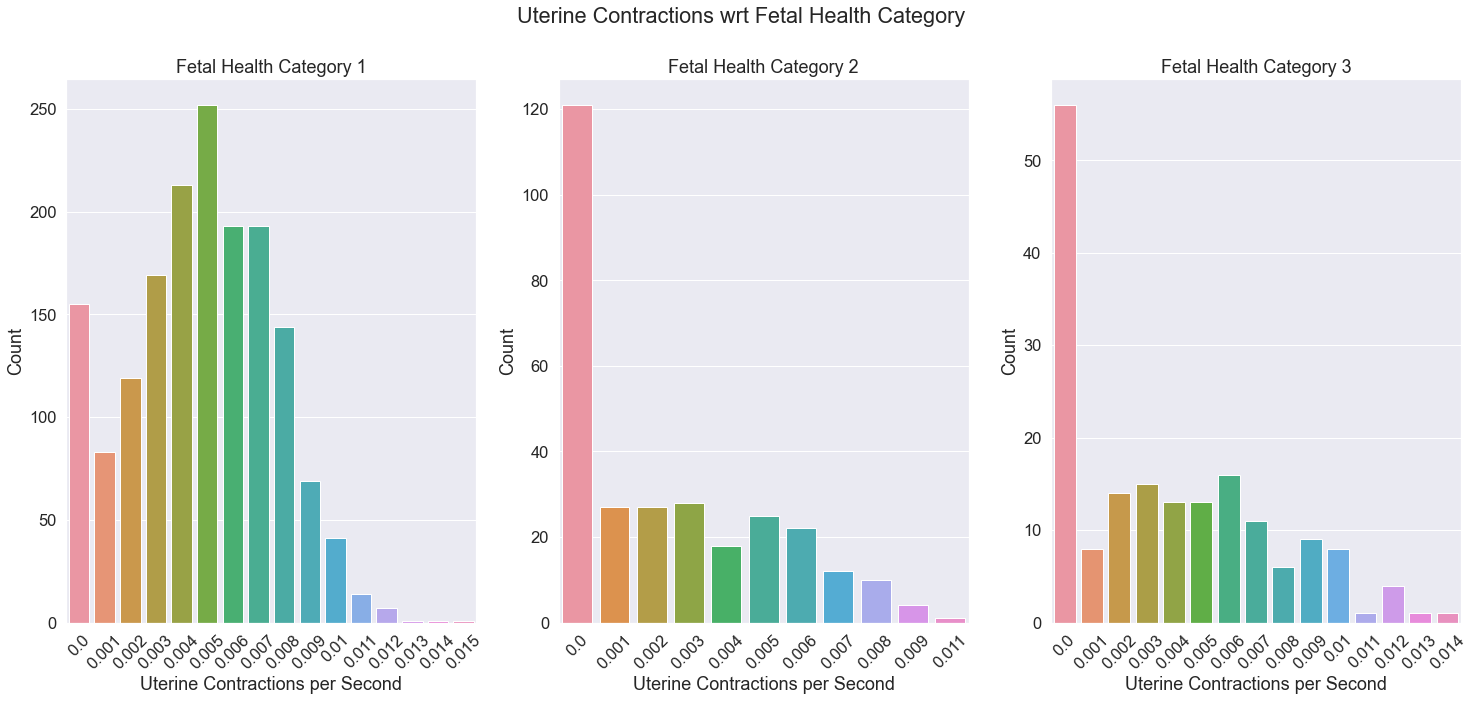

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(25,10))

# individial count plots per category (not same scales)
for i in range(1,4):
    sns.countplot(data=fh_data[fh_data['fetal_health'] == i], x='uterine_contractions', ax=ax[i-1])
    ax[i-1].tick_params(axis='x', rotation=45)
    ax[i-1].set_title(f'Fetal Health Category {i}')
    ax[i-1].set_xlabel('Uterine Contractions per Second')
    ax[i-1].set_ylabel('Count')
    
fig.suptitle('Uterine Contractions wrt Fetal Health Category')
plt.show()

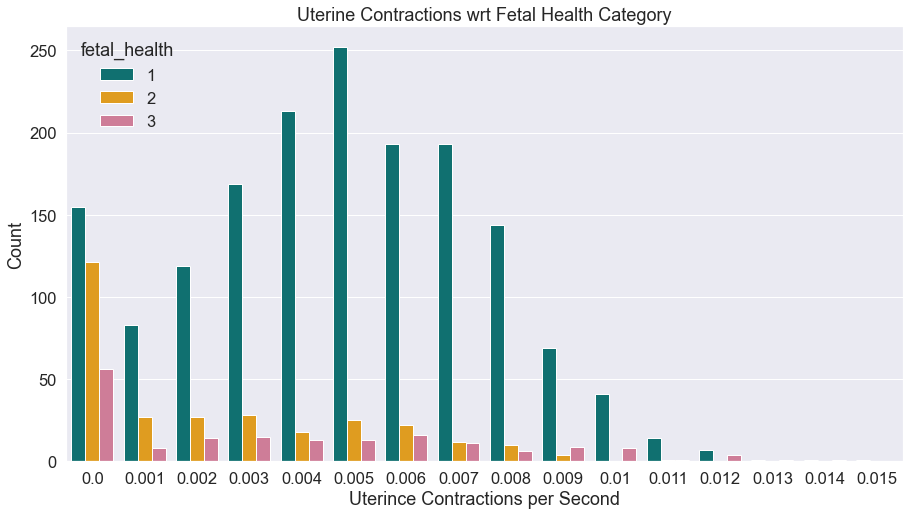

In [21]:
# count plots overlayed on same scale
plt.figure(figsize=(15,8))
sns.countplot(data=fh_data, x='uterine_contractions', hue='fetal_health', palette=color)
plt.title('Uterine Contractions wrt Fetal Health Category')
plt.xlabel('Uterince Contractions per Second')
plt.ylabel('Count')
plt.show()

Most fetuses in suspect and pathological cases experienced no acceleration, indicating that labor was not progressing. Additionally, more fetuses in suspect and pathological cases experienced high levels of acceleration, indicating that the mother might have experienced uterine hyperstimulation. Both observations give credence to acceleration's significance in affecting fetal health.

### <font color='mediumseagreen'> Analyzing Decelerations </font>

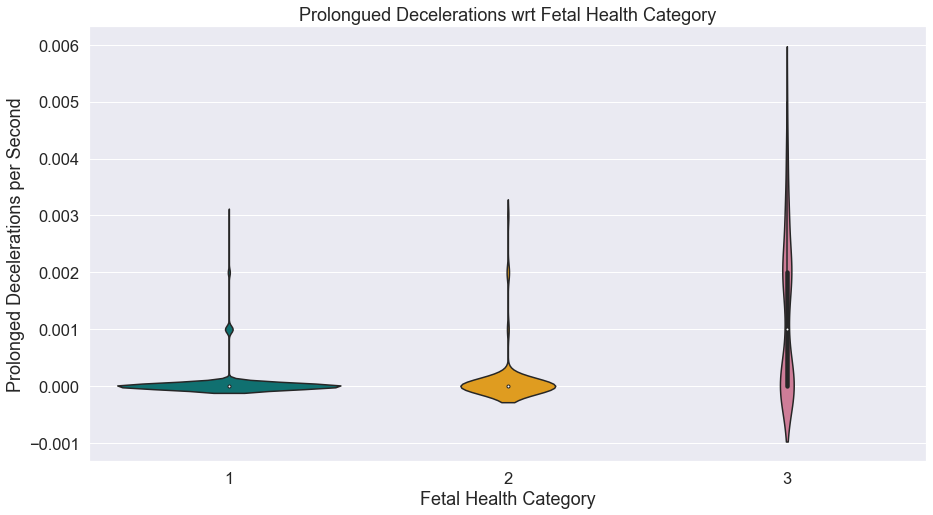

In [22]:
# violin plot to analyze prolonged deceleration distribution
plt.figure(figsize=(15,8))
sns.violinplot(data=fh_data, x='fetal_health', y='prolongued_decelerations', palette=color)
plt.title('Prolongued Decelerations wrt Fetal Health Category')
plt.xlabel('Fetal Health Category')
plt.ylabel('Prolonged Decelerations per Second')
plt.show()

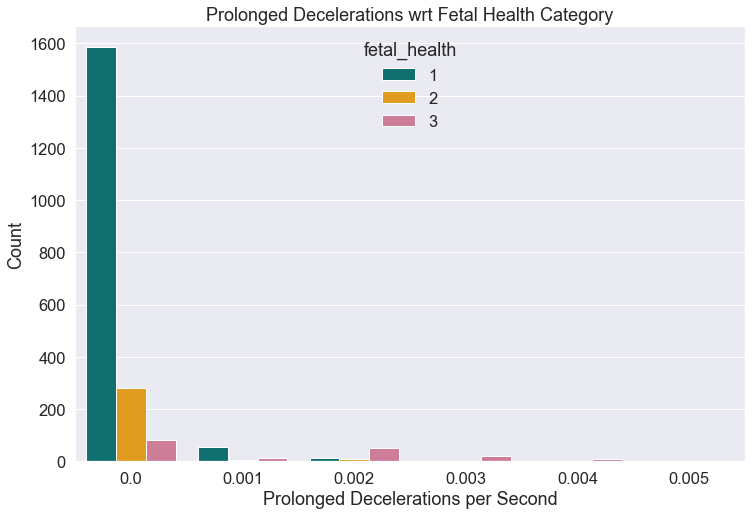

In [23]:
# count plots overlayed on same scale
plt.figure(figsize=(12,8))
sns.countplot(data=fh_data, x='prolongued_decelerations', hue='fetal_health', palette=color)
plt.title('Prolonged Decelerations wrt Fetal Health Category')
plt.xlabel('Prolonged Decelerations per Second')
plt.ylabel('Count')
plt.show()

Most healthy fetuses do not experience prolonged decelerations

### <font color='mediumseagreen'> Analyzing Fetal Movement </font>

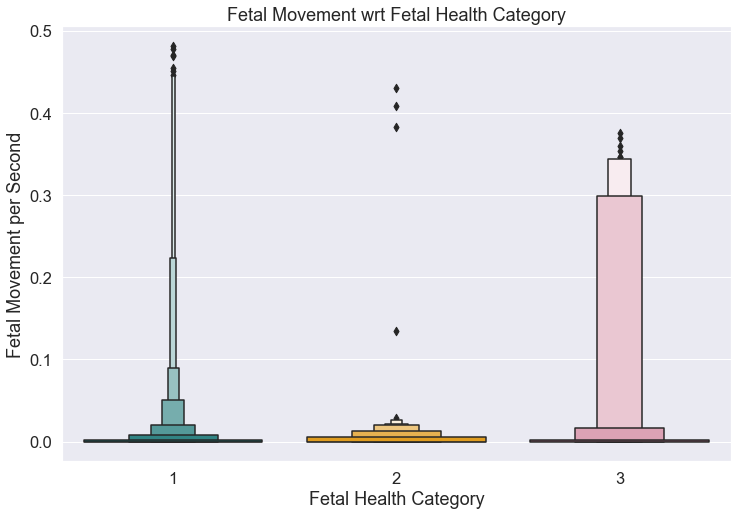

In [24]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=fh_data, x='fetal_health', y='fetal_movement', palette=color)
plt.title('Fetal Movement wrt Fetal Health Category')
plt.xlabel('Fetal Health Category')
plt.ylabel('Fetal Movement per Second')
plt.show()

In [25]:
fh_data.groupby('fetal_health')['fetal_movement'].mean()

fetal_health
1    0.007963
2    0.008332
3    0.025676
Name: fetal_movement, dtype: float64

Fetuses in the pathological case experience significant amounts of movement compared to the normal and suspect cases.

### <font color='mediumseagreen'> Analyzing STV/LTV </font>

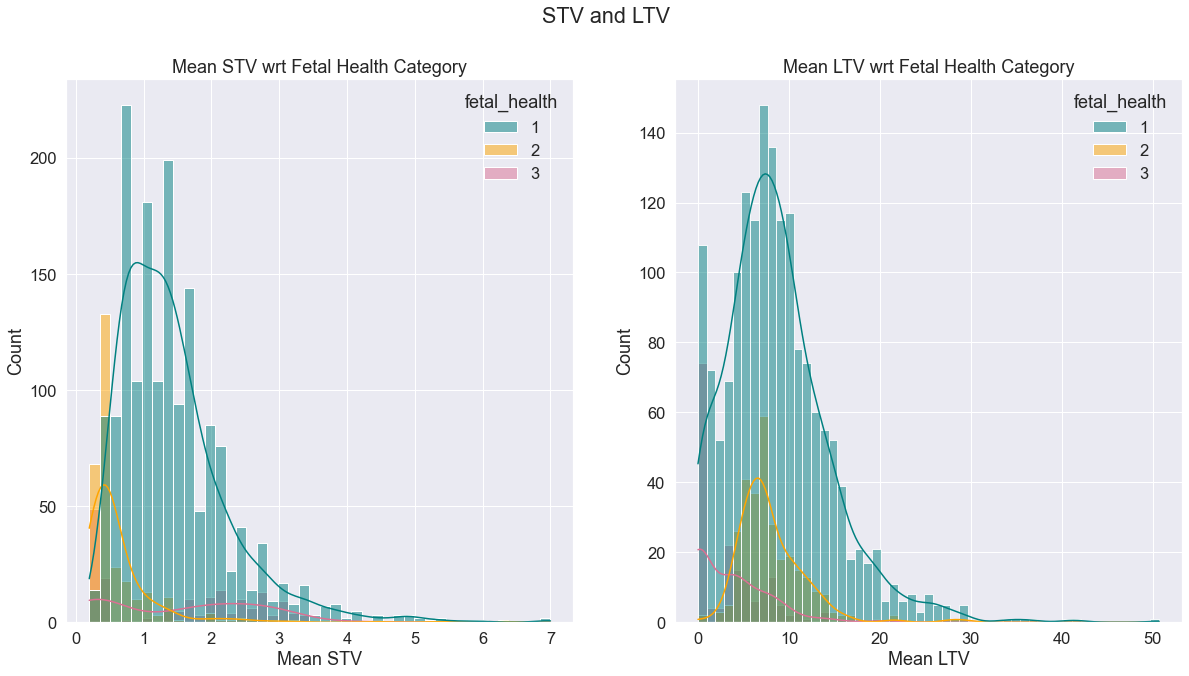

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

sns.histplot(data=fh_data, x='mean_STV', kde=True, hue='fetal_health', palette=color, ax=ax[0])
sns.histplot(data=fh_data, x='mean_LTV', kde=True, hue='fetal_health', palette=color, ax=ax[1])
ax[0].set_title('Mean STV wrt Fetal Health Category')
ax[0].set_xlabel('Mean STV')
ax[0].set_ylabel('Count')
ax[1].set_title('Mean LTV wrt Fetal Health Category')
ax[1].set_xlabel('Mean LTV')
ax[1].set_ylabel('Count')

fig.suptitle('STV and LTV')
plt.show()

# <font color='lightsalmon'> Model Selection & Building </font>

## <font color='palevioletred'> Data Transforms and Scaling </font>

In [27]:
X = fh_data.drop(columns=['fetal_health']).values
y = fh_data['fetal_health'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 11), (638, 11), (1488,), (638,))

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)       # don't leak data about training set

## <font color='palevioletred'> Logistic Regression </font>

In [30]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[468  19   7]
 [ 34  49   3]
 [  7  11  40]]
Accuracy: 0.8730407523510971


In [32]:
# k-fold cross validation
accuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
print('Accuracy: {:.2f}%'.format(accuracies.mean() * 100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std() * 100))

Accuracy: 88.51%
Standard Deviation: 2.23%


In [33]:
# grid search to find best parameters for model
parameters = {'penalty':            ['none', 'l2'],
               'tol':               [0.0001, 0.0002, 0.0003],
               'C':                 [0.01, 0.1, 0.5, 1.0, 10, 100],
               'intercept_scaling': [1, 2, 3],
               }
grid_search = GridSearchCV(estimator=lr, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best Accuracy: {:.2f}%'.format(grid_search.best_score_ * 100))
print('Best Parameters:', grid_search.best_params_)

Best Accuracy: 88.78%
Best Parameters: {'C': 0.1, 'intercept_scaling': 1, 'penalty': 'l2', 'tol': 0.0001}


In [34]:
lr = LogisticRegression(penalty='l2', tol=0.0001, C=0.1, intercept_scaling=1, random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 (coefficient of determination) on training set:', lr.score(X_train, y_train))
print('R^2 (coefficient of determination) on testing set:', lr.score(X_test, y_test))

Mean Square Error: 0.19278996865203762
Root Mean Square Error: 0.4390785449689356
R^2 (coefficient of determination) on training set: 0.8891129032258065
R^2 (coefficient of determination) on testing set: 0.8730407523510971


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.96      0.93       494
           2       0.63      0.55      0.58        86
           3       0.83      0.66      0.73        58

    accuracy                           0.87       638
   macro avg       0.79      0.72      0.75       638
weighted avg       0.87      0.87      0.87       638



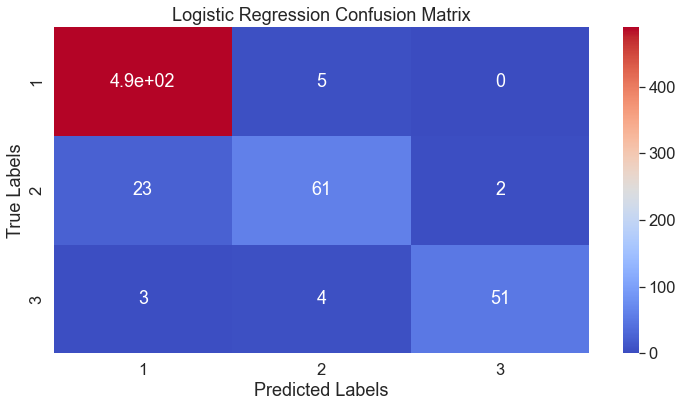

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## <font color='palevioletred'> K-Nearest Neighbors </font>

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[477  15   2]
 [ 30  55   1]
 [  7   6  45]]
Accuracy: 0.9043887147335423


In [39]:
# k-fold cross validation - different test sets to see accuracies
accuracies = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
print('Accuracy: {:.2f}%'.format(accuracies.mean() * 100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std() * 100))

Accuracy: 90.12%
Standard Deviation: 2.11%


In [40]:
# grid search to find best parameters for model
parameters = {'n_neighbors':    np.arange(1, 21),
              'leaf_size':      np.arange(1, 21),
              'p':              [1,2]}

grid_search = GridSearchCV(estimator=knn, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best Accuracy: {:.2f}%'.format(grid_search.best_score_ * 100))
print('Best Parameters:', grid_search.best_params_)

Best Accuracy: 91.33%
Best Parameters: {'leaf_size': 1, 'n_neighbors': 3, 'p': 1}


In [41]:
knn = KNeighborsClassifier(n_neighbors=3, p=1, leaf_size=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 (coefficient of determination) on training set:', knn.score(X_train, y_train))
print('R^2 (coefficient of determination) on testing set:', knn.score(X_test, y_test))

Mean Square Error: 0.10501567398119123
Root Mean Square Error: 0.3240612194959329
R^2 (coefficient of determination) on training set: 0.9603494623655914
R^2 (coefficient of determination) on testing set: 0.9184952978056427


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.96      0.96       494
           2       0.73      0.72      0.73        86
           3       0.91      0.86      0.88        58

    accuracy                           0.92       638
   macro avg       0.86      0.85      0.86       638
weighted avg       0.92      0.92      0.92       638



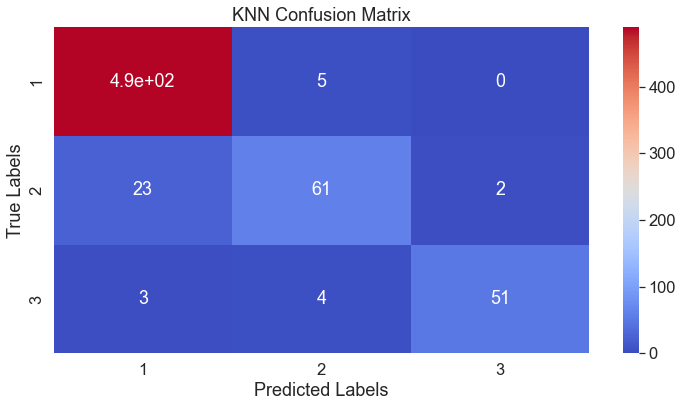

In [64]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## <font color='palevioletred'> Kernel Support Vector Machine (SVM) </font>

In [44]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [45]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[479  13   2]
 [ 33  52   1]
 [ 13   8  37]]
Accuracy: 0.890282131661442


In [46]:
# k-fold cross validation - different test sets to see accuracies
accuracies = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=10)
print('Accuracy: {:.2f}%'.format(accuracies.mean() * 100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std() * 100))

Accuracy: 89.71%
Standard Deviation: 2.63%


In [47]:
# grid search to find best parameters for model
parameters = [{'C':         [0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 5, 10],
               'kernel':    ['linear'] },
              {'C':         [0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 5, 10],
               'kernel':    ['rbf', 'poly', 'sigmoid'],
               'gamma':     [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] }]

grid_search = GridSearchCV(estimator=svc, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best Accuracy: {:.2f}%'.format(grid_search.best_score_ * 100))
print('Best Parameters:', grid_search.best_params_)

Best Accuracy: 92.40%
Best Parameters: {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}


In [48]:
svc = SVC(C=10, kernel='rbf', gamma=0.2, random_state=0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 (coefficient of determination) on training set:', svc.score(X_train, y_train))
print('R^2 (coefficient of determination) on testing set:', svc.score(X_test, y_test))

Mean Square Error: 0.10501567398119123
Root Mean Square Error: 0.3240612194959329
R^2 (coefficient of determination) on training set: 0.9690860215053764
R^2 (coefficient of determination) on testing set: 0.9184952978056427


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.97      0.96       494
           2       0.75      0.67      0.71        86
           3       0.92      0.84      0.88        58

    accuracy                           0.92       638
   macro avg       0.87      0.83      0.85       638
weighted avg       0.92      0.92      0.92       638



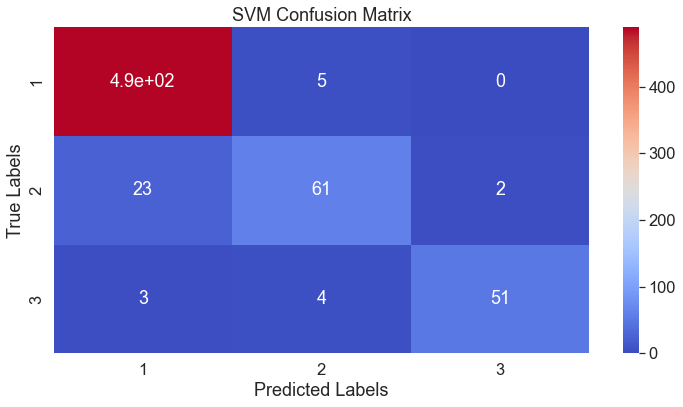

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## <font color='palevioletred'> Random Forest (RF) </font>

In [51]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [52]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[488   6   0]
 [ 26  58   2]
 [  2   4  52]]
Accuracy: 0.9373040752351097


In [53]:
# k-fold cross validation - different test sets to see accuracies
accuracies = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
print('Accuracy: {:.2f}%'.format(accuracies.mean() * 100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std() * 100))

Accuracy: 94.02%
Standard Deviation: 1.71%


In [54]:
# grid search to find best parameters for model
parameters = {'n_estimators':       [100, 200, 300, 400, 500],
              'criterion':          ['gini', 'entropy'],
              'min_samples_split':  [2, 6, 20],
              'min_samples_leaf':   [1, 4, 16]
              }

grid_search = GridSearchCV(estimator=rf, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best Accuracy: {:.2f}%'.format(grid_search.best_score_ * 100))
print('Best Parameters:', grid_search.best_params_)

Best Accuracy: 94.08%
Best Parameters: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [55]:
rf = RandomForestClassifier(n_estimators=300, criterion='entropy', min_samples_split=2, min_samples_leaf=1, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 (coefficient of determination) on training set:', rf.score(X_train, y_train))
print('R^2 (coefficient of determination) on testing set:', rf.score(X_test, y_test))

Mean Square Error: 0.07210031347962383
Root Mean Square Error: 0.2685150153708798
R^2 (coefficient of determination) on training set: 0.9986559139784946
R^2 (coefficient of determination) on testing set: 0.9420062695924765


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       494
           2       0.87      0.71      0.78        86
           3       0.96      0.88      0.92        58

    accuracy                           0.94       638
   macro avg       0.93      0.86      0.89       638
weighted avg       0.94      0.94      0.94       638



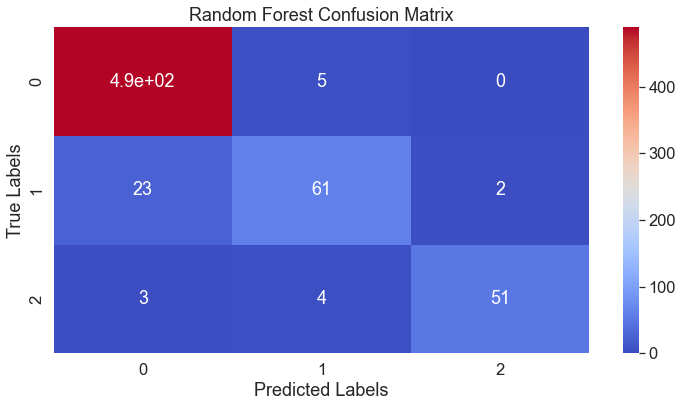

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## <font color='palevioletred'> Model Conclusions </font>

In [58]:
accs = {'Training Accuracy':    [lr.score(X_train, y_train), knn.score(X_train, y_train), svc.score(X_train, y_train), rf.score(X_train, y_train)],
        'Testing Accuracy':     [lr.score(X_test, y_test), knn.score(X_test, y_test), svc.score(X_test, y_test), rf.score(X_test, y_test)]}
 
pd.DataFrame(accs, index=['Logistic Regression', 'K-Nearest Neighbors', 'Kernel Support Vector Machine', 'Random Forest'])

,Training Accuracy,Testing Accuracy
Logistic Regression,0.889113,0.873041
K-Nearest Neighbors,0.960349,0.918495
Kernel Support Vector Machine,0.969086,0.918495
Random Forest,0.998656,0.942006


Conclusively, the hypertuned Random Forest model is the best tested model for this dataset for accurately predicting the health of a fetus given the necessary features.

In [61]:
file = open('random_forest_classification_model.pkl', 'wb')
pickle.dump(rf, file)
file.close()